In [1]:
import numpy as np
import os
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno

import warnings
warnings.filterwarnings('ignore')

os.chdir('C:\\Users\\solov\\Desktop\\sample_project\\data')

# Importing data about Phoenix

## So at the beginning I import excel with Phoenix departures from 2019
## then I drop unnecessary columns
## then I rename the columns to be lowercase and joined by underscore

In [2]:
df = pd.read_excel('Phoenix_departures_2019_AA.xlsx')

In [3]:
df = df.drop(['Delay Carrier (Minutes)','Delay Weather (Minutes)','Delay National Aviation System (Minutes)',
              'Delay Security (Minutes)', 'Delay Late Aircraft Arrival (Minutes)'],axis = 1)

In [4]:
df.head()

,Carrier Code,Date (MM/DD/YYYY),Flight Number,Tail Number,Destination Airport,Scheduled departure time,Actual departure time,Scheduled elapsed time (Minutes),Actual elapsed time (Minutes),Departure delay (Minutes),Wheels-off time,Taxi-Out time (Minutes)
0,AA,2019-01-01 00:00:00,155.0,N912AN,STL,16:31:00,16:36:00,171.0,169.0,5.0,17:04:00,28.0
1,AA,2019-01-01 00:00:00,221.0,N962AN,BOI,21:21:00,21:18:00,131.0,125.0,-3.0,21:36:00,18.0
2,AA,2019-01-01 00:00:00,291.0,N991NN,MIA,01:15:00,01:24:00,245.0,236.0,9.0,01:34:00,10.0
3,AA,2019-01-01 00:00:00,372.0,N803NN,MSP,09:42:00,10:16:00,189.0,159.0,34.0,10:28:00,12.0
4,AA,2019-01-01 00:00:00,407.0,N207UW,DFW,07:45:00,07:45:00,137.0,128.0,0.0,07:58:00,13.0


In [5]:
df.columns

Index(['Carrier Code', 'Date (MM/DD/YYYY)', 'Flight Number', 'Tail Number',
       'Destination Airport', 'Scheduled departure time',
       'Actual departure time', 'Scheduled elapsed time (Minutes)',
       'Actual elapsed time (Minutes)', 'Departure delay (Minutes)',
       'Wheels-off time', 'Taxi-Out time (Minutes)'],
      dtype='object')

In [6]:
df.columns = df.columns.str.lower()
df.columns = df.columns.str.split()
df.columns = df.columns.str.join('_')

In [7]:
df.columns

Index(['carrier_code', 'date_(mm/dd/yyyy)', 'flight_number', 'tail_number',
       'destination_airport', 'scheduled_departure_time',
       'actual_departure_time', 'scheduled_elapsed_time_(minutes)',
       'actual_elapsed_time_(minutes)', 'departure_delay_(minutes)',
       'wheels-off_time', 'taxi-out_time_(minutes)'],
      dtype='object')

## Then I'm going to be dealing with missing values

Axes(0.125,0.11;0.775x0.77)


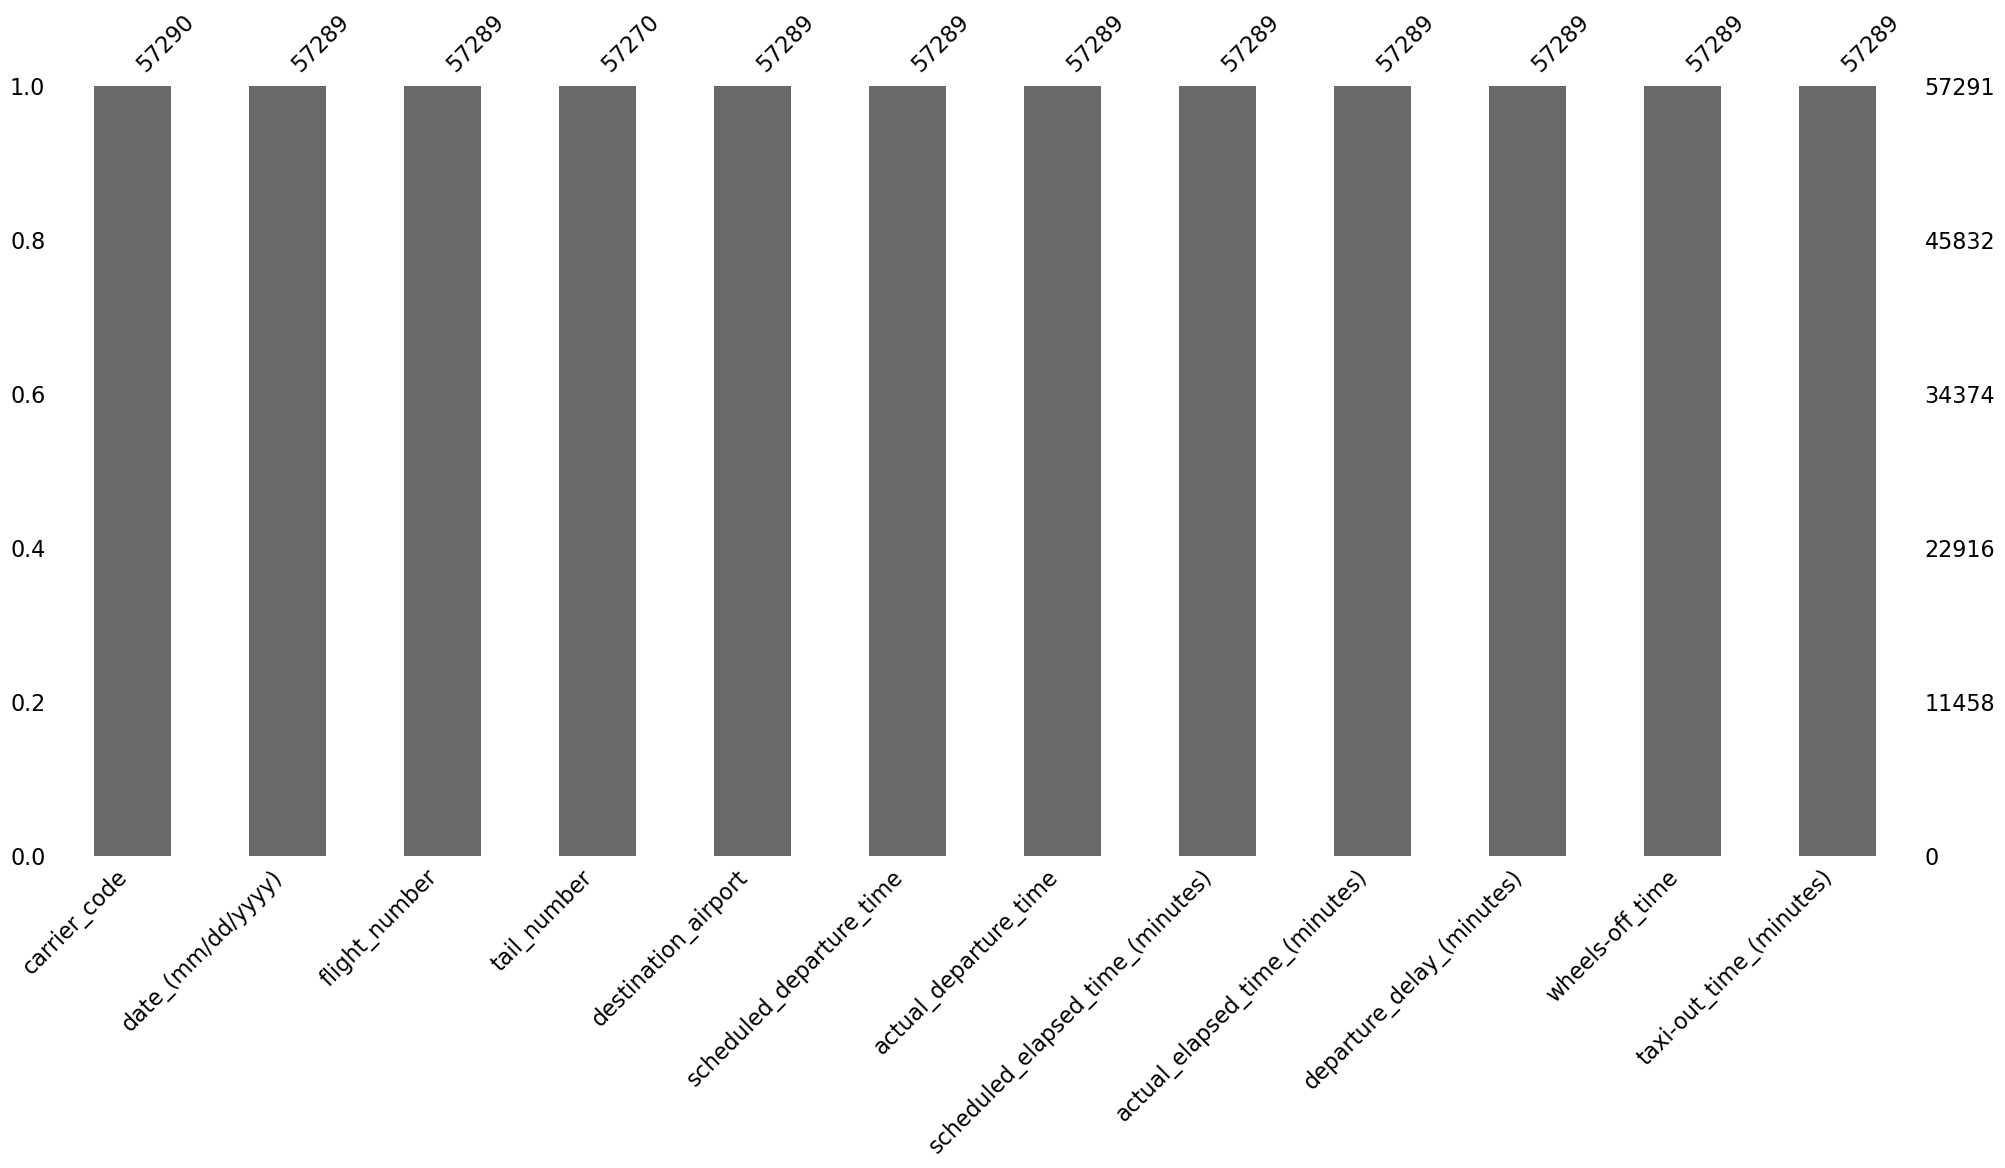

In [8]:
print(msno.bar(df)) #this command prints out the bars, each representing a column in dataframe
                    #we see that the most common value is 57289 , and there are 2 columns with 57290 and 57270 resp.

In [9]:
missing_values = df.isnull().sum()
missing_values.sort_values(ascending = True)

carrier_code                         1
date_(mm/dd/yyyy)                    2
flight_number                        2
destination_airport                  2
scheduled_departure_time             2
actual_departure_time                2
scheduled_elapsed_time_(minutes)     2
actual_elapsed_time_(minutes)        2
departure_delay_(minutes)            2
wheels-off_time                      2
taxi-out_time_(minutes)              2
tail_number                         21
dtype: int64

## let's display the last five rows of the dataframe

In [10]:
df.tail()

,carrier_code,date_(mm/dd/yyyy),flight_number,tail_number,destination_airport,scheduled_departure_time,actual_departure_time,scheduled_elapsed_time_(minutes),actual_elapsed_time_(minutes),departure_delay_(minutes),wheels-off_time,taxi-out_time_(minutes)
57286,AA,12/31/2019,2874.0,N805AW,SLC,08:24:00,08:22:00,104.0,104.0,-2.0,08:42:00,20.0
57287,AA,12/31/2019,2880.0,N774XF,TUS,21:30:00,21:25:00,46.0,65.0,-5.0,21:54:00,29.0
57288,AA,12/31/2019,2920.0,N753US,OMA,20:34:00,20:29:00,151.0,146.0,-5.0,20:43:00,14.0
57289,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57290,SOURCE: Bureau of Transportation Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## we see that the last two rows have some irrelevant information, that may account for some missing values
## let's drop them

In [11]:
df = df.drop([57289,57290], axis = 0)

In [12]:
df.tail() #displaying the last rows of the dataframe we see that the irrelevant rows were dropped

,carrier_code,date_(mm/dd/yyyy),flight_number,tail_number,destination_airport,scheduled_departure_time,actual_departure_time,scheduled_elapsed_time_(minutes),actual_elapsed_time_(minutes),departure_delay_(minutes),wheels-off_time,taxi-out_time_(minutes)
57284,AA,12/31/2019,2829.0,N919NN,PDX,18:34:00,19:19:00,171.0,179.0,45.0,19:32:00,13.0
57285,AA,12/31/2019,2853.0,N776XF,SBA,21:22:00,21:40:00,96.0,91.0,18.0,21:57:00,17.0
57286,AA,12/31/2019,2874.0,N805AW,SLC,08:24:00,08:22:00,104.0,104.0,-2.0,08:42:00,20.0
57287,AA,12/31/2019,2880.0,N774XF,TUS,21:30:00,21:25:00,46.0,65.0,-5.0,21:54:00,29.0
57288,AA,12/31/2019,2920.0,N753US,OMA,20:34:00,20:29:00,151.0,146.0,-5.0,20:43:00,14.0


## Let's see the missing_values now

In [13]:
missing_values = df.isnull().sum()
missing_values.sort_values(ascending = True)

carrier_code                         0
date_(mm/dd/yyyy)                    0
flight_number                        0
destination_airport                  0
scheduled_departure_time             0
actual_departure_time                0
scheduled_elapsed_time_(minutes)     0
actual_elapsed_time_(minutes)        0
departure_delay_(minutes)            0
wheels-off_time                      0
taxi-out_time_(minutes)              0
tail_number                         19
dtype: int64

## So we see that there's still 19 missing valuesin the tail_number column
## Let's display them and store them in a dataframe called tail_number_0

In [14]:
tail_number_0 = df[df.tail_number.isnull()]

In [15]:
tail_number_0

,carrier_code,date_(mm/dd/yyyy),flight_number,tail_number,destination_airport,scheduled_departure_time,actual_departure_time,scheduled_elapsed_time_(minutes),actual_elapsed_time_(minutes),departure_delay_(minutes),wheels-off_time,taxi-out_time_(minutes)
11045,AA,2019-11-03 00:00:00,2298.0,NaN,DFW,17:10:00,00:00:00,139.0,0.0,0.0,00:00:00,0.0
11371,AA,03/13/2019,2298.0,NaN,DFW,17:10:00,00:00:00,139.0,0.0,0.0,00:00:00,0.0
12211,AA,03/18/2019,1280.0,NaN,JFK,21:54:00,00:00:00,281.0,0.0,0.0,00:00:00,0.0
12213,AA,03/18/2019,1386.0,NaN,SLC,16:50:00,00:00:00,96.0,0.0,0.0,00:00:00,0.0
12386,AA,03/19/2019,1580.0,NaN,EWR,08:43:00,00:00:00,283.0,0.0,0.0,00:00:00,0.0
12420,AA,03/19/2019,2339.0,NaN,JFK,08:51:00,00:00:00,296.0,0.0,0.0,00:00:00,0.0
12431,AA,03/19/2019,2746.0,NaN,SLC,21:20:00,00:00:00,95.0,0.0,0.0,00:00:00,0.0
12536,AA,03/20/2019,1200.0,NaN,EWR,13:58:00,00:00:00,274.0,0.0,0.0,00:00:00,0.0
12581,AA,03/20/2019,2298.0,NaN,DFW,17:10:00,00:00:00,139.0,0.0,0.0,00:00:00,0.0
12591,AA,03/20/2019,2651.0,NaN,JFK,23:18:00,00:00:00,284.0,0.0,0.0,00:00:00,0.0


## Let's now take the indexes of this dataframe and store them in a list
## It will prove useful in the next step when we want to drop these rows from data frame
## I want to drop them from data frame because columns 'actual_departure_time', 
## 'scheduled_elapsed_time_(minutes)', 'actual_elapsed_time_(minutes)', 'departure_delay_(minutes)', 
## 'wheels-off_time', 'taxi-out_time_(minutes) are all not informative, containing only zeros

In [16]:
indexes_tail_number_0 = tail_number_0.index.tolist()

In [17]:
df = df.drop(indexes_tail_number_0,axis= 0 )

## Let's display the missing values bars now:

Axes(0.125,0.11;0.775x0.77)


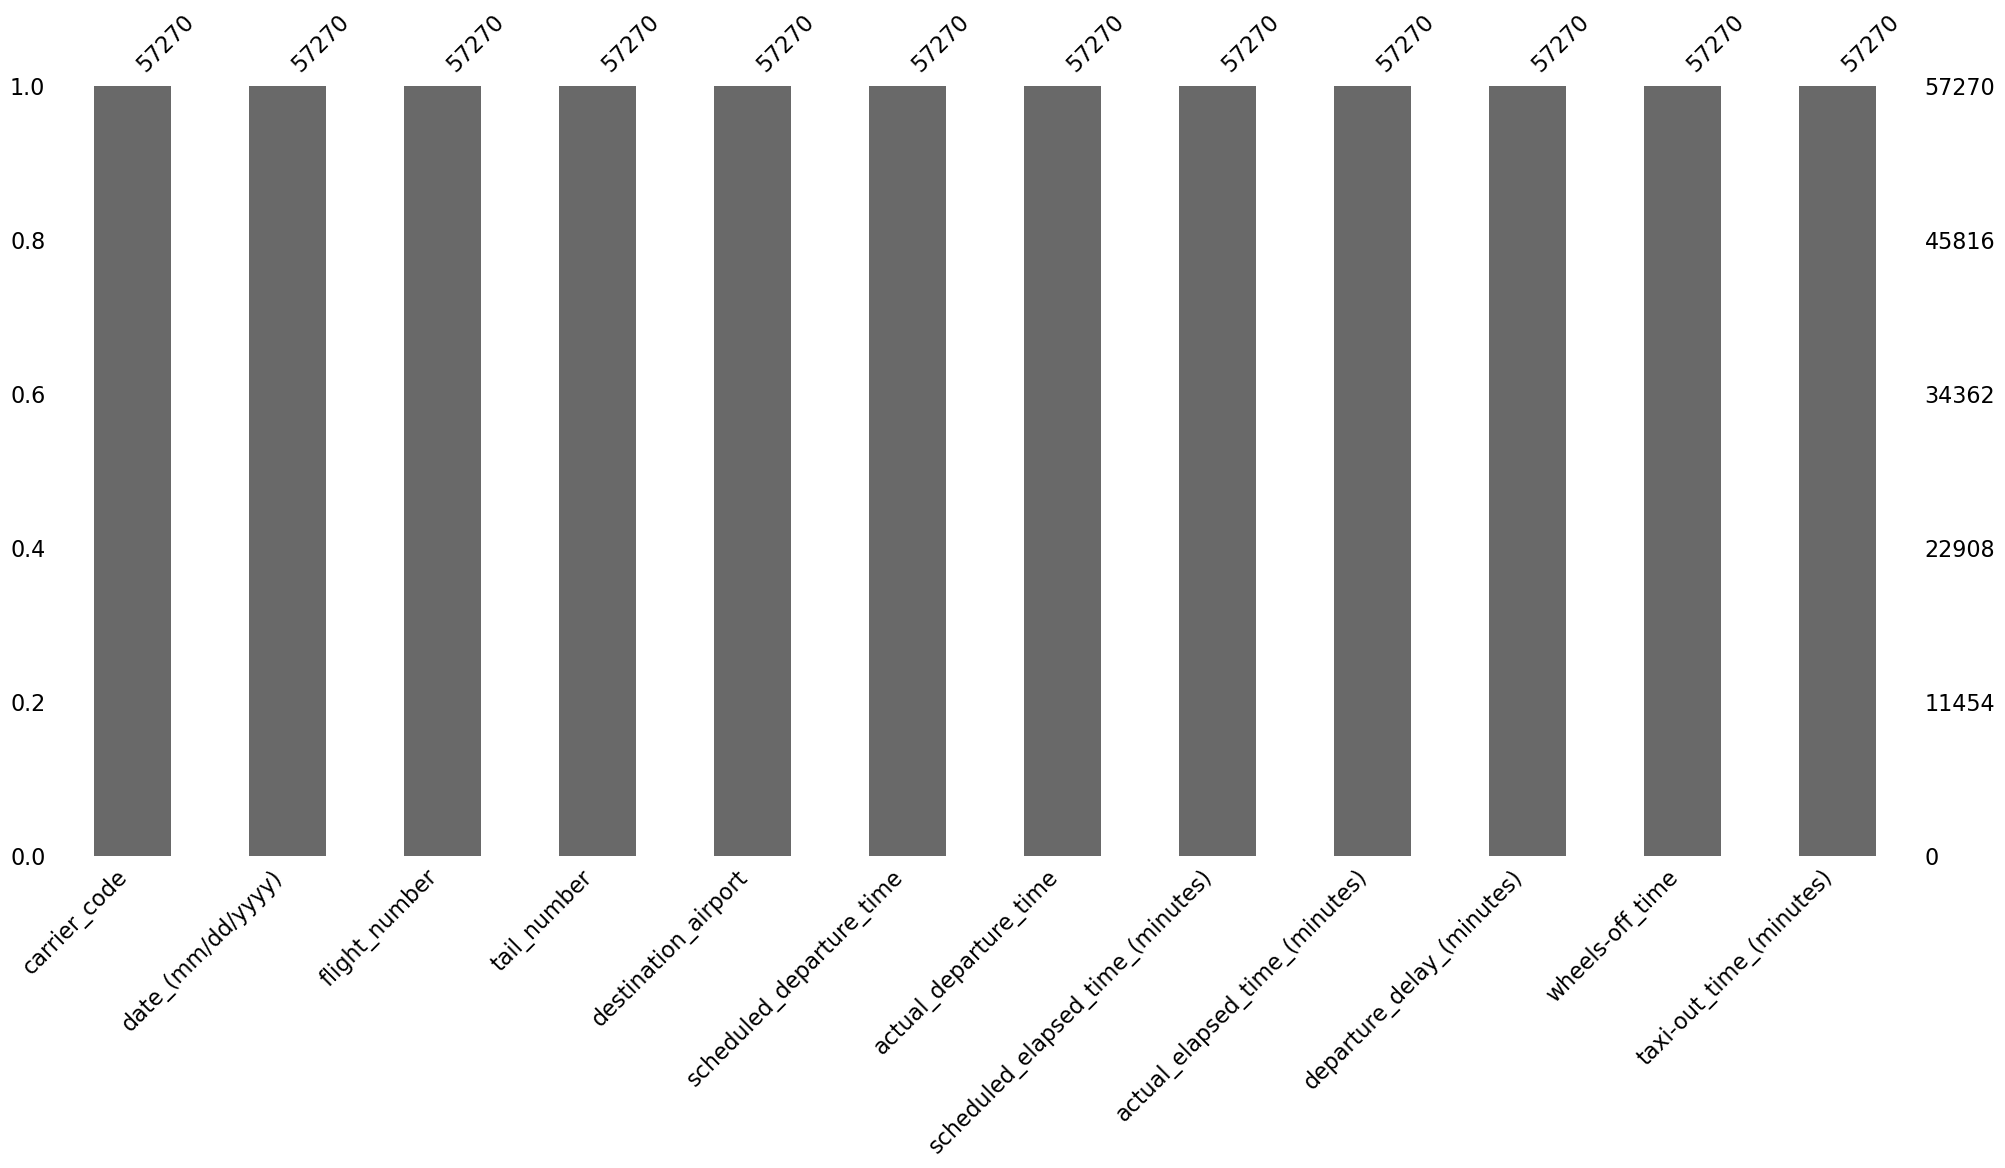

In [18]:
print(msno.bar(df))

## <span style="color: red;">We see that dataframe is now complete containing</span> 57270 rows

## Let's display the dataframe now:

In [19]:
df

,carrier_code,date_(mm/dd/yyyy),flight_number,tail_number,destination_airport,scheduled_departure_time,actual_departure_time,scheduled_elapsed_time_(minutes),actual_elapsed_time_(minutes),departure_delay_(minutes),wheels-off_time,taxi-out_time_(minutes)
0,AA,2019-01-01 00:00:00,155.0,N912AN,STL,16:31:00,16:36:00,171.0,169.0,5.0,17:04:00,28.0
1,AA,2019-01-01 00:00:00,221.0,N962AN,BOI,21:21:00,21:18:00,131.0,125.0,-3.0,21:36:00,18.0
2,AA,2019-01-01 00:00:00,291.0,N991NN,MIA,01:15:00,01:24:00,245.0,236.0,9.0,01:34:00,10.0
3,AA,2019-01-01 00:00:00,372.0,N803NN,MSP,09:42:00,10:16:00,189.0,159.0,34.0,10:28:00,12.0
4,AA,2019-01-01 00:00:00,407.0,N207UW,DFW,07:45:00,07:45:00,137.0,128.0,0.0,07:58:00,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...
57284,AA,12/31/2019,2829.0,N919NN,PDX,18:34:00,19:19:00,171.0,179.0,45.0,19:32:00,13.0
57285,AA,12/31/2019,2853.0,N776XF,SBA,21:22:00,21:40:00,96.0,91.0,18.0,21:57:00,17.0
57286,AA,12/31/2019,2874.0,N805AW,SLC,08:24:00,08:22:00,104.0,104.0,-2.0,08:42:00,20.0
57287,AA,12/31/2019,2880.0,N774XF,TUS,21:30:00,21:25:00,46.0,65.0,-5.0,21:54:00,29.0


## Now let's be dealing with types of variables
## in the specific rows; let's display the types of variables in this data frame

In [20]:
df.dtypes

carrier_code                         object
date_(mm/dd/yyyy)                    object
flight_number                       float64
tail_number                          object
destination_airport                  object
scheduled_departure_time             object
actual_departure_time                object
scheduled_elapsed_time_(minutes)    float64
actual_elapsed_time_(minutes)       float64
departure_delay_(minutes)           float64
wheels-off_time                      object
taxi-out_time_(minutes)             float64
dtype: object

## We see that the following columns:
## <span style="color: red;">date_(mm/dd/yyyy) and scheduled_departure_time and actual_departure_time and wheels-off_time</span>
## are of type object, therefore it's plain text and from the nature of tose columns we understand that they should
## be of format date and time respectively
## let's change the types of these columns

In [21]:
#First I'm going to be dealing with date_(mm/dd/yyyy) column
#Seeing as this column has dates in different formats, e.g. '2019-01-01 00:00:00' and '12/31/2019'
#we need to separate those and convert them to datetime type

#For that I'll create a column with name date_mixed, that contains rows with both formats

#Creating colummn date_mixed

df['date_mixed'] = df['date_(mm/dd/yyyy)']

#This will add a column date_mixed on the right, but keep the original column
#That's why we need to drop the old column

df = df.drop('date_(mm/dd/yyyy)',axis= 1)

In [22]:
#Now let's convert the times of format object into this format 'yyyy-mm-dd'

df['date_mm/dd/yyyy'] = pd.to_datetime(df['date_mixed'], format='%m/%d/%Y', errors='coerce')

In [23]:
df

,carrier_code,flight_number,tail_number,destination_airport,scheduled_departure_time,actual_departure_time,scheduled_elapsed_time_(minutes),actual_elapsed_time_(minutes),departure_delay_(minutes),wheels-off_time,taxi-out_time_(minutes),date_mixed,date_mm/dd/yyyy
0,AA,155.0,N912AN,STL,16:31:00,16:36:00,171.0,169.0,5.0,17:04:00,28.0,2019-01-01 00:00:00,2019-01-01
1,AA,221.0,N962AN,BOI,21:21:00,21:18:00,131.0,125.0,-3.0,21:36:00,18.0,2019-01-01 00:00:00,2019-01-01
2,AA,291.0,N991NN,MIA,01:15:00,01:24:00,245.0,236.0,9.0,01:34:00,10.0,2019-01-01 00:00:00,2019-01-01
3,AA,372.0,N803NN,MSP,09:42:00,10:16:00,189.0,159.0,34.0,10:28:00,12.0,2019-01-01 00:00:00,2019-01-01
4,AA,407.0,N207UW,DFW,07:45:00,07:45:00,137.0,128.0,0.0,07:58:00,13.0,2019-01-01 00:00:00,2019-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
57284,AA,2829.0,N919NN,PDX,18:34:00,19:19:00,171.0,179.0,45.0,19:32:00,13.0,12/31/2019,2019-12-31
57285,AA,2853.0,N776XF,SBA,21:22:00,21:40:00,96.0,91.0,18.0,21:57:00,17.0,12/31/2019,2019-12-31
57286,AA,2874.0,N805AW,SLC,08:24:00,08:22:00,104.0,104.0,-2.0,08:42:00,20.0,12/31/2019,2019-12-31
57287,AA,2880.0,N774XF,TUS,21:30:00,21:25:00,46.0,65.0,-5.0,21:54:00,29.0,12/31/2019,2019-12-31


In [24]:
#Checking if there are no null values in the column 'date_mm/dd/yyyy' and seeing that it is 0

df['date_mm/dd/yyyy'].isnull().sum()

0

In [25]:
#Now we can drop the date_mixed column as it is unnecessary anymore
df = df.drop('date_mixed',axis=1)

In [26]:
df

,carrier_code,flight_number,tail_number,destination_airport,scheduled_departure_time,actual_departure_time,scheduled_elapsed_time_(minutes),actual_elapsed_time_(minutes),departure_delay_(minutes),wheels-off_time,taxi-out_time_(minutes),date_mm/dd/yyyy
0,AA,155.0,N912AN,STL,16:31:00,16:36:00,171.0,169.0,5.0,17:04:00,28.0,2019-01-01
1,AA,221.0,N962AN,BOI,21:21:00,21:18:00,131.0,125.0,-3.0,21:36:00,18.0,2019-01-01
2,AA,291.0,N991NN,MIA,01:15:00,01:24:00,245.0,236.0,9.0,01:34:00,10.0,2019-01-01
3,AA,372.0,N803NN,MSP,09:42:00,10:16:00,189.0,159.0,34.0,10:28:00,12.0,2019-01-01
4,AA,407.0,N207UW,DFW,07:45:00,07:45:00,137.0,128.0,0.0,07:58:00,13.0,2019-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...
57284,AA,2829.0,N919NN,PDX,18:34:00,19:19:00,171.0,179.0,45.0,19:32:00,13.0,2019-12-31
57285,AA,2853.0,N776XF,SBA,21:22:00,21:40:00,96.0,91.0,18.0,21:57:00,17.0,2019-12-31
57286,AA,2874.0,N805AW,SLC,08:24:00,08:22:00,104.0,104.0,-2.0,08:42:00,20.0,2019-12-31
57287,AA,2880.0,N774XF,TUS,21:30:00,21:25:00,46.0,65.0,-5.0,21:54:00,29.0,2019-12-31


In [27]:
#Let's see how the types of columns in dataframe have changed
#We see now that column 'date_mm/dd/yyyy' is of datetime64 type and not object anymore
df.dtypes

carrier_code                                object
flight_number                              float64
tail_number                                 object
destination_airport                         object
scheduled_departure_time                    object
actual_departure_time                       object
scheduled_elapsed_time_(minutes)           float64
actual_elapsed_time_(minutes)              float64
departure_delay_(minutes)                  float64
wheels-off_time                             object
taxi-out_time_(minutes)                    float64
date_mm/dd/yyyy                     datetime64[ns]
dtype: object

## Now let's consider scheduled_departure_time and actual_departure_time and wheels-off_time
## They are of type object and need to be converted to datetime type as well

In [28]:
df['actual_departure_time'] = pd.to_datetime(df['actual_departure_time'], format='%H:%M:%S').dt.time
df['actual_departure_time_DT'] = df['date_mm/dd/yyyy'] + pd.to_timedelta(df['actual_departure_time'].astype(str))


df['scheduled_departure_time'] = pd.to_datetime(df['scheduled_departure_time'], format='%H:%M:%S').dt.time
df['scheduled_departure_time_DT'] = df['date_mm/dd/yyyy'] + pd.to_timedelta(df['scheduled_departure_time'].astype(str))

df['wheels-off_time'] = pd.to_datetime(df['wheels-off_time'], format='%H:%M:%S').dt.time
df['wheels-off_time_DT'] = df['date_mm/dd/yyyy'] + pd.to_timedelta(df['wheels-off_time'].astype(str))

## Let's check the types now:

In [29]:
df.dtypes

carrier_code                                object
flight_number                              float64
tail_number                                 object
destination_airport                         object
scheduled_departure_time                    object
actual_departure_time                       object
scheduled_elapsed_time_(minutes)           float64
actual_elapsed_time_(minutes)              float64
departure_delay_(minutes)                  float64
wheels-off_time                             object
taxi-out_time_(minutes)                    float64
date_mm/dd/yyyy                     datetime64[ns]
actual_departure_time_DT            datetime64[ns]
scheduled_departure_time_DT         datetime64[ns]
wheels-off_time_DT                  datetime64[ns]
dtype: object

In [30]:
df

,carrier_code,flight_number,tail_number,destination_airport,scheduled_departure_time,actual_departure_time,scheduled_elapsed_time_(minutes),actual_elapsed_time_(minutes),departure_delay_(minutes),wheels-off_time,taxi-out_time_(minutes),date_mm/dd/yyyy,actual_departure_time_DT,scheduled_departure_time_DT,wheels-off_time_DT
0,AA,155.0,N912AN,STL,16:31:00,16:36:00,171.0,169.0,5.0,17:04:00,28.0,2019-01-01,2019-01-01 16:36:00,2019-01-01 16:31:00,2019-01-01 17:04:00
1,AA,221.0,N962AN,BOI,21:21:00,21:18:00,131.0,125.0,-3.0,21:36:00,18.0,2019-01-01,2019-01-01 21:18:00,2019-01-01 21:21:00,2019-01-01 21:36:00
2,AA,291.0,N991NN,MIA,01:15:00,01:24:00,245.0,236.0,9.0,01:34:00,10.0,2019-01-01,2019-01-01 01:24:00,2019-01-01 01:15:00,2019-01-01 01:34:00
3,AA,372.0,N803NN,MSP,09:42:00,10:16:00,189.0,159.0,34.0,10:28:00,12.0,2019-01-01,2019-01-01 10:16:00,2019-01-01 09:42:00,2019-01-01 10:28:00
4,AA,407.0,N207UW,DFW,07:45:00,07:45:00,137.0,128.0,0.0,07:58:00,13.0,2019-01-01,2019-01-01 07:45:00,2019-01-01 07:45:00,2019-01-01 07:58:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57284,AA,2829.0,N919NN,PDX,18:34:00,19:19:00,171.0,179.0,45.0,19:32:00,13.0,2019-12-31,2019-12-31 19:19:00,2019-12-31 18:34:00,2019-12-31 19:32:00
57285,AA,2853.0,N776XF,SBA,21:22:00,21:40:00,96.0,91.0,18.0,21:57:00,17.0,2019-12-31,2019-12-31 21:40:00,2019-12-31 21:22:00,2019-12-31 21:57:00
57286,AA,2874.0,N805AW,SLC,08:24:00,08:22:00,104.0,104.0,-2.0,08:42:00,20.0,2019-12-31,2019-12-31 08:22:00,2019-12-31 08:24:00,2019-12-31 08:42:00
57287,AA,2880.0,N774XF,TUS,21:30:00,21:25:00,46.0,65.0,-5.0,21:54:00,29.0,2019-12-31,2019-12-31 21:25:00,2019-12-31 21:30:00,2019-12-31 21:54:00


## Now I can drop the columns now redundant scheduled_departure_time and actual_departure_time and wheels-off_time

In [31]:
df = df.drop(['scheduled_departure_time', 'actual_departure_time', 'wheels-off_time'], axis = 1)

In [32]:
df

,carrier_code,flight_number,tail_number,destination_airport,scheduled_elapsed_time_(minutes),actual_elapsed_time_(minutes),departure_delay_(minutes),taxi-out_time_(minutes),date_mm/dd/yyyy,actual_departure_time_DT,scheduled_departure_time_DT,wheels-off_time_DT
0,AA,155.0,N912AN,STL,171.0,169.0,5.0,28.0,2019-01-01,2019-01-01 16:36:00,2019-01-01 16:31:00,2019-01-01 17:04:00
1,AA,221.0,N962AN,BOI,131.0,125.0,-3.0,18.0,2019-01-01,2019-01-01 21:18:00,2019-01-01 21:21:00,2019-01-01 21:36:00
2,AA,291.0,N991NN,MIA,245.0,236.0,9.0,10.0,2019-01-01,2019-01-01 01:24:00,2019-01-01 01:15:00,2019-01-01 01:34:00
3,AA,372.0,N803NN,MSP,189.0,159.0,34.0,12.0,2019-01-01,2019-01-01 10:16:00,2019-01-01 09:42:00,2019-01-01 10:28:00
4,AA,407.0,N207UW,DFW,137.0,128.0,0.0,13.0,2019-01-01,2019-01-01 07:45:00,2019-01-01 07:45:00,2019-01-01 07:58:00
...,...,...,...,...,...,...,...,...,...,...,...,...
57284,AA,2829.0,N919NN,PDX,171.0,179.0,45.0,13.0,2019-12-31,2019-12-31 19:19:00,2019-12-31 18:34:00,2019-12-31 19:32:00
57285,AA,2853.0,N776XF,SBA,96.0,91.0,18.0,17.0,2019-12-31,2019-12-31 21:40:00,2019-12-31 21:22:00,2019-12-31 21:57:00
57286,AA,2874.0,N805AW,SLC,104.0,104.0,-2.0,20.0,2019-12-31,2019-12-31 08:22:00,2019-12-31 08:24:00,2019-12-31 08:42:00
57287,AA,2880.0,N774XF,TUS,46.0,65.0,-5.0,29.0,2019-12-31,2019-12-31 21:25:00,2019-12-31 21:30:00,2019-12-31 21:54:00


## And lastly let's rename the columns so they don't have _DT after them

In [33]:
df['actual_departure_time'] = df['actual_departure_time_DT']
df['scheduled_departure_time'] = df['scheduled_departure_time_DT']
df['wheels-off_time'] = df['wheels-off_time_DT']

## And drop the columns with _DT at the end

In [34]:
df = df.drop(['actual_departure_time_DT','scheduled_departure_time_DT','wheels-off_time_DT'], axis=1)

In [35]:
df

,carrier_code,flight_number,tail_number,destination_airport,scheduled_elapsed_time_(minutes),actual_elapsed_time_(minutes),departure_delay_(minutes),taxi-out_time_(minutes),date_mm/dd/yyyy,actual_departure_time,scheduled_departure_time,wheels-off_time
0,AA,155.0,N912AN,STL,171.0,169.0,5.0,28.0,2019-01-01,2019-01-01 16:36:00,2019-01-01 16:31:00,2019-01-01 17:04:00
1,AA,221.0,N962AN,BOI,131.0,125.0,-3.0,18.0,2019-01-01,2019-01-01 21:18:00,2019-01-01 21:21:00,2019-01-01 21:36:00
2,AA,291.0,N991NN,MIA,245.0,236.0,9.0,10.0,2019-01-01,2019-01-01 01:24:00,2019-01-01 01:15:00,2019-01-01 01:34:00
3,AA,372.0,N803NN,MSP,189.0,159.0,34.0,12.0,2019-01-01,2019-01-01 10:16:00,2019-01-01 09:42:00,2019-01-01 10:28:00
4,AA,407.0,N207UW,DFW,137.0,128.0,0.0,13.0,2019-01-01,2019-01-01 07:45:00,2019-01-01 07:45:00,2019-01-01 07:58:00
...,...,...,...,...,...,...,...,...,...,...,...,...
57284,AA,2829.0,N919NN,PDX,171.0,179.0,45.0,13.0,2019-12-31,2019-12-31 19:19:00,2019-12-31 18:34:00,2019-12-31 19:32:00
57285,AA,2853.0,N776XF,SBA,96.0,91.0,18.0,17.0,2019-12-31,2019-12-31 21:40:00,2019-12-31 21:22:00,2019-12-31 21:57:00
57286,AA,2874.0,N805AW,SLC,104.0,104.0,-2.0,20.0,2019-12-31,2019-12-31 08:22:00,2019-12-31 08:24:00,2019-12-31 08:42:00
57287,AA,2880.0,N774XF,TUS,46.0,65.0,-5.0,29.0,2019-12-31,2019-12-31 21:25:00,2019-12-31 21:30:00,2019-12-31 21:54:00


In [36]:
df.dtypes

carrier_code                                object
flight_number                              float64
tail_number                                 object
destination_airport                         object
scheduled_elapsed_time_(minutes)           float64
actual_elapsed_time_(minutes)              float64
departure_delay_(minutes)                  float64
taxi-out_time_(minutes)                    float64
date_mm/dd/yyyy                     datetime64[ns]
actual_departure_time               datetime64[ns]
scheduled_departure_time            datetime64[ns]
wheels-off_time                     datetime64[ns]
dtype: object

## Now for future purposes I'll create a column named DepDel15 this column will have number 1 if the flight is delayed for more than 15 mins at departure and number 0 if the plane is on time or delayed for less than 15 mins

In [37]:
# this function I'm defining is meant to classify
# if the flight is considered delayed or not
def classify_delay(departure_delay):
    if departure_delay >= 15:
        return 1
    else:
        return 0

df['DepDel15'] = df['departure_delay_(minutes)'].apply(classify_delay)

In [38]:
df['DepDel15'] #now we see that there's a column displaying 0 and 1,
#0=flight on time, 1 -flight delayed

0        0
1        0
2        0
3        1
4        0
        ..
57284    1
57285    1
57286    0
57287    0
57288    0
Name: DepDel15, Length: 57270, dtype: int64

## <span style="color: red;">Gonna try to convert date time columns into some valuable information that can be used in ML algorithm</span>

In [39]:
df['month'] = df['date_mm/dd/yyyy'].dt.month

In [40]:
df['day'] = df['date_mm/dd/yyyy'].dt.day

In [41]:
#Converting actual_departure_time data into numbers
df['act_dep_time_hr'] = df['actual_departure_time'].dt.hour
df['act_dep_time_min'] = df['actual_departure_time'].dt.minute

In [42]:
#Converting scheduled_departure_time data into numbers

df['sch_dep_time_hr'] = df['scheduled_departure_time'].dt.hour
df['sch_dep_time_min'] = df['scheduled_departure_time'].dt.minute

In [43]:
#Converting wheels-off_time data into numbers

df['wo_time_hr'] = df['wheels-off_time'].dt.hour
df['wo_time_min'] = df['wheels-off_time'].dt.minute

In [44]:
df

,carrier_code,flight_number,tail_number,destination_airport,scheduled_elapsed_time_(minutes),actual_elapsed_time_(minutes),departure_delay_(minutes),taxi-out_time_(minutes),date_mm/dd/yyyy,actual_departure_time,...,wheels-off_time,DepDel15,month,day,act_dep_time_hr,act_dep_time_min,sch_dep_time_hr,sch_dep_time_min,wo_time_hr,wo_time_min
0,AA,155.0,N912AN,STL,171.0,169.0,5.0,28.0,2019-01-01,2019-01-01 16:36:00,...,2019-01-01 17:04:00,0,1,1,16,36,16,31,17,4
1,AA,221.0,N962AN,BOI,131.0,125.0,-3.0,18.0,2019-01-01,2019-01-01 21:18:00,...,2019-01-01 21:36:00,0,1,1,21,18,21,21,21,36
2,AA,291.0,N991NN,MIA,245.0,236.0,9.0,10.0,2019-01-01,2019-01-01 01:24:00,...,2019-01-01 01:34:00,0,1,1,1,24,1,15,1,34
3,AA,372.0,N803NN,MSP,189.0,159.0,34.0,12.0,2019-01-01,2019-01-01 10:16:00,...,2019-01-01 10:28:00,1,1,1,10,16,9,42,10,28
4,AA,407.0,N207UW,DFW,137.0,128.0,0.0,13.0,2019-01-01,2019-01-01 07:45:00,...,2019-01-01 07:58:00,0,1,1,7,45,7,45,7,58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57284,AA,2829.0,N919NN,PDX,171.0,179.0,45.0,13.0,2019-12-31,2019-12-31 19:19:00,...,2019-12-31 19:32:00,1,12,31,19,19,18,34,19,32
57285,AA,2853.0,N776XF,SBA,96.0,91.0,18.0,17.0,2019-12-31,2019-12-31 21:40:00,...,2019-12-31 21:57:00,1,12,31,21,40,21,22,21,57
57286,AA,2874.0,N805AW,SLC,104.0,104.0,-2.0,20.0,2019-12-31,2019-12-31 08:22:00,...,2019-12-31 08:42:00,0,12,31,8,22,8,24,8,42
57287,AA,2880.0,N774XF,TUS,46.0,65.0,-5.0,29.0,2019-12-31,2019-12-31 21:25:00,...,2019-12-31 21:54:00,0,12,31,21,25,21,30,21,54


## Now we still have one categorical value and that is destination_airport
## We have to encode it to be numbers using LabelEncoder

In [45]:
df['destination_airport'].unique()

array(['STL', 'BOI', 'MIA', 'MSP', 'DFW', 'MCO', 'OGG', 'OAK', 'SFO',
       'LAS', 'IAH', 'LAX', 'SAT', 'GEG', 'MCI', 'ORD', 'ATL', 'SJC',
       'PHL', 'SAN', 'CMH', 'AUS', 'CLT', 'DEN', 'RNO', 'TPA', 'SMF',
       'ONT', 'DSM', 'SEA', 'PIT', 'BWI', 'DTW', 'SLC', 'IND', 'OMA',
       'TUS', 'KOA', 'MKE', 'LIH', 'DCA', 'HNL', 'PDX', 'SNA', 'EWR',
       'JFK', 'BOS', 'GRR', 'OKC', 'MEM', 'PSP', 'BUR', 'FAT', 'RDU',
       'ANC', 'SBA', 'ABQ', 'COS', 'CVG', 'FLL', 'FAR', 'MSY'],
      dtype=object)

In [46]:
len(df['destination_airport'].unique())

62

In [47]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['dest_airport_label'] = label_encoder.fit_transform(df['destination_airport'])

In [49]:
df[['destination_airport','dest_airport_label']].head(10)

,destination_airport,dest_airport_label
0,STL,59
1,BOI,4
2,MIA,34
3,MSP,36
4,DFW,14
5,MCO,32
6,OGG,39
7,MCO,32
8,OAK,38
9,SFO,54


## So these **destination_airport, date_mm/dd/yyyy, actual_departure_time, scheduled_departure_time, wheels-off_time** 
## columns have been properly encoded and can be removed now

In [50]:
df= df.drop(['destination_airport','date_mm/dd/yyyy','actual_departure_time',
             'scheduled_departure_time', 'wheels-off_time'],axis=1)

## Carrier_code and tail_number can be removed also

In [51]:
df= df.drop(['carrier_code', 'tail_number'],axis=1)

In [52]:
df

,flight_number,scheduled_elapsed_time_(minutes),actual_elapsed_time_(minutes),departure_delay_(minutes),taxi-out_time_(minutes),DepDel15,month,day,act_dep_time_hr,act_dep_time_min,sch_dep_time_hr,sch_dep_time_min,wo_time_hr,wo_time_min,dest_airport_label
0,155.0,171.0,169.0,5.0,28.0,0,1,1,16,36,16,31,17,4,59
1,221.0,131.0,125.0,-3.0,18.0,0,1,1,21,18,21,21,21,36,4
2,291.0,245.0,236.0,9.0,10.0,0,1,1,1,24,1,15,1,34,34
3,372.0,189.0,159.0,34.0,12.0,1,1,1,10,16,9,42,10,28,36
4,407.0,137.0,128.0,0.0,13.0,0,1,1,7,45,7,45,7,58,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57284,2829.0,171.0,179.0,45.0,13.0,1,12,31,19,19,18,34,19,32,44
57285,2853.0,96.0,91.0,18.0,17.0,1,12,31,21,40,21,22,21,57,52
57286,2874.0,104.0,104.0,-2.0,20.0,0,12,31,8,22,8,24,8,42,56
57287,2880.0,46.0,65.0,-5.0,29.0,0,12,31,21,25,21,30,21,54,61


In [53]:
df.dtypes

flight_number                       float64
scheduled_elapsed_time_(minutes)    float64
actual_elapsed_time_(minutes)       float64
departure_delay_(minutes)           float64
taxi-out_time_(minutes)             float64
DepDel15                              int64
month                                 int32
day                                   int32
act_dep_time_hr                       int32
act_dep_time_min                      int32
sch_dep_time_hr                       int32
sch_dep_time_min                      int32
wo_time_hr                            int32
wo_time_min                           int32
dest_airport_label                    int32
dtype: object

In [54]:
df['flight_number'] = df['flight_number'].astype('int64')
df['scheduled_elapsed_time_(minutes)'] = df['scheduled_elapsed_time_(minutes)'].astype('int64')
df['actual_elapsed_time_(minutes)'] = df['actual_elapsed_time_(minutes)'].astype('int64')
df['departure_delay_(minutes)'] = df['departure_delay_(minutes)'].astype('int64')
df['taxi-out_time_(minutes)'] = df['taxi-out_time_(minutes)'].astype('int64')

In [55]:
df.dtypes

flight_number                       int64
scheduled_elapsed_time_(minutes)    int64
actual_elapsed_time_(minutes)       int64
departure_delay_(minutes)           int64
taxi-out_time_(minutes)             int64
DepDel15                            int64
month                               int32
day                                 int32
act_dep_time_hr                     int32
act_dep_time_min                    int32
sch_dep_time_hr                     int32
sch_dep_time_min                    int32
wo_time_hr                          int32
wo_time_min                         int32
dest_airport_label                  int32
dtype: object

In [56]:
df.to_csv('PHX_ready_ML.csv', index=False)